# Recommendation system for books:
Recommendation engine for books based on the similarity scores.

## Importing libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset:

In [28]:
df=pd.read_csv('bookRecommendation.csv',encoding='cp1252')
df.head() #Retrieving the first 5 records.

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


## EDA

In [29]:
df.isnull().sum() # checking for null values

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [34]:
df.info() ##Datatypes of each feature in the df Dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   userid      10000 non-null  int64 
 2   title       10000 non-null  object
 3   rating      10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [8]:
df.drop(columns='Unnamed: 0',inplace=True) # Dropping the unnamed column because it is not important in the analysis.
#inplace=True refelects the changes in the original df Dataframe.

In [30]:
df.rename(columns={'User.ID':'userid','Book.Title':'title','Book.Rating':'rating'},inplace=True) # renaming the column for 
##easy accessing of features during the analysis.

In [10]:
df['userid'].value_counts() # finding the count of each user in the 'userid' column.

3757      523
162052    214
2276      212
4017      156
277427    150
         ... 
230         1
771         1
2850        1
277284      1
161757      1
Name: userid, Length: 2182, dtype: int64

In [33]:
df['title'].value_counts() # finding the count of each title in the title column.

Fahrenheit 451                                               5
Ender's Game (Ender Wiggins Saga (Paperback))                4
The Amber Spyglass (His Dark Materials, Book 3)              4
Charlie and the Chocolate Factory                            4
Stardust                                                     4
                                                            ..
Let's Tell Time (First-Start Easy Reader)                    1
Love's Encore                                                1
Ensenar A Pensar                                             1
That Kind Of Girl (Silhouette Intimate Moments, No. 1116)    1
Man Who Fell to Earth                                        1
Name: title, Length: 9659, dtype: int64

### Explanation:
In the below block of code, I am creating a new dataframe by grouping title with the rating and calculating the mean, count, i.e. for each unique title mean and count is calculated represented by the ratings_df Dataframe.

In [36]:
ratings_gp=ratings.groupby(by='title')['rating'].mean() #Grouping using the groupby() function from the pandas library
#and finding the mean.
ratings_df=pd.DataFrame(ratings_gp).rename(columns={'rating':'average_rating'}) #renaming the ratings feature to average 
#rating using the rename() function.
ratings_df['total_rating_count']=pd.DataFrame(df.groupby(by='title')['rating'].count()) #creating a new feature of total_rating_count
# in the ratings_df which is the total number of ratings for each title
ratings_df.head() #Retrieving the first 5 records

,average_rating,total_rating_count
title,,
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,7.0,1
"1,401 More Things That P*Ss Me Off",10.0,1
1001 Brilliant Ways to Checkmate,10.0,1
101 Essential Tips: House Plants,9.0,1
101 Wacky Computer Jokes,7.0,1


###  In the below statements, I am creating a barplot of the title to visualise the no. of ratings given for each title and sorting them based on the highest number of ratings.

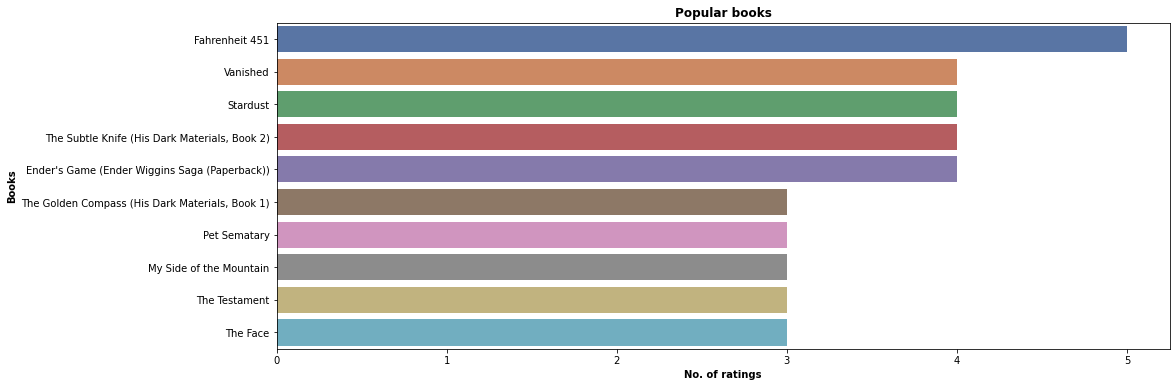

In [41]:
plt.figure(figsize=(16,6))
ratings_sort=ratings_df.sort_values(by='total_rating_count',ascending=False).head(10) #sorting the values based on the 
#highest no. of ratings given to each book using sort_values() function.
ax = sns.barplot(x=ratings_sort['total_rating_count'], y=ratings_sort.index, data=ratings_sort, palette='deep') #using the 
#barplot() function from seaborn library, plotting the index of the ratings_df which is title on the y axis and total 
#rating coubt for each book on the x axis.
plt.title('Popular books', weight='bold')
plt.xlabel('No. of ratings', weight='bold')
plt.ylabel('Books', weight='bold')
plt.savefig('scored_books.png')

From the above plot, the book Fahrenheit 451 is given highest rating.

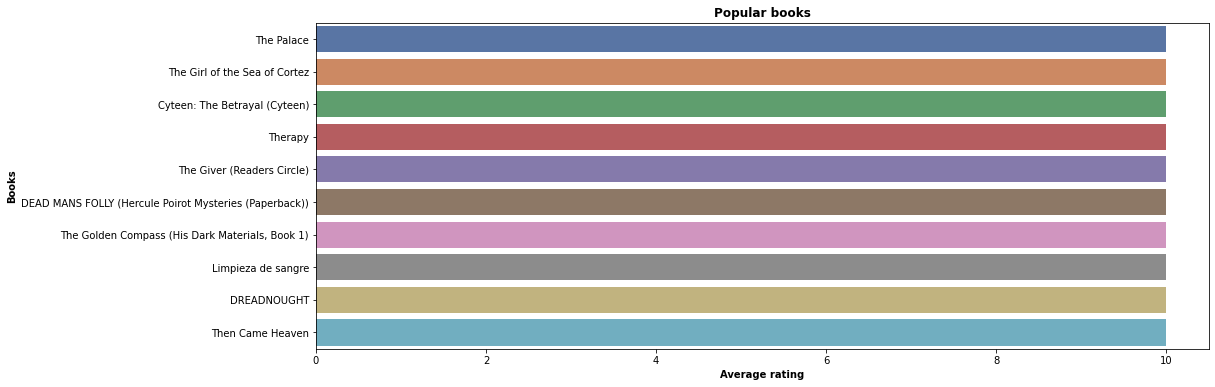

In [42]:
plt.figure(figsize=(16,6))
ratings_sort=ratings_df.sort_values(by='average_rating',ascending=False).head(10) #sorting based on the highest average rating
#for each book.
ax = sns.barplot(x=ratings_sort['average_rating'], y=ratings_sort.index, data=ratings_sort, palette='deep')
#plt.xlim(3.55, 5.25)
plt.title('Popular books', weight='bold')
plt.xlabel('Average rating', weight='bold')
plt.ylabel('Books', weight='bold')
plt.savefig('scored_books.png')

From the above plot, we see that most of the books have been given good rating.

## Creating a pivot table:

In [17]:
ratings_pivot=df.pivot_table(index='title',columns='userid',values='rating').fillna(0) #creating a pivot table of index 
#title and columns as userid. values inside this pivot table are ratings.
ratings_pivot

userid,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


### Most of the values are zero because not every user has rated every movie.

In [43]:
ratings_matrix=ratings_pivot.values # obtaining the array of values.

# Building the model

In [46]:
from sklearn.neighbors import NearestNeighbors
model_knn= NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(ratings_matrix) #fitting the model to the pivot matrix

NearestNeighbors(algorithm='brute', metric='cosine')

Obtaining the similarity scores based on the Nearest neighbors.We can also use pairwise_distance class and obtain the similarity score but I have used KNN because it gives the similarity scores and also based on the nearest distance which will be easier to build the recommendation. Since K neighbors finds the nearest neighbors based on the nearest distance, we can find the similarity scores based on this distance as (similarity score=1-distance). With this we can find out if suppose some random user has read a book 'x', then the next recommendation that will be given to him will be the book based which has the highest similarity score with the book 'x'. The similarity scores any two parameters is found out by using cosine of the angle made by the vector of the two parameters.
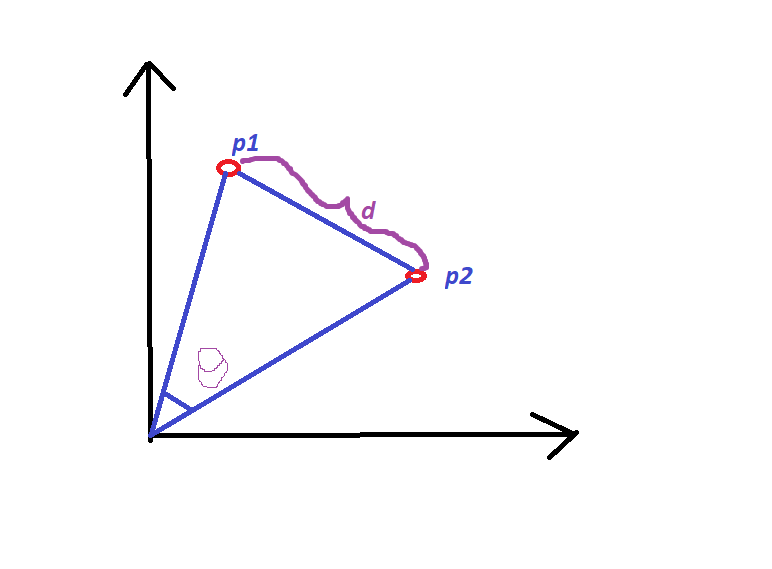

The lesser the distance between these two points, the more is the similarity score. Because if the distance between two points decreases, the angle between them is lesser and cos( angle between them) increases and this is the similarity score.Higher the similarity scores, higher is the probability of that book getting recommended. This is how a recommendation engine works.

In [47]:
query_index=np.random.choice(ratings_pivot.shape[0]) #using the random.choice from the numpy library,obtaining some random 
#index no.
print(query_index)

2058


In [48]:
distances,indices= model_knn.kneighbors(ratings_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)#ratings_pivot.iloc[query_index,:].values.reshape(1,-1)
#will obtain the 2058th row value in array format and will reshape it to a dimension of 2. kneighbours will find the eucledian
#distance of this entire record with other records and andd give the distance and distance and indices of the nearest 6
#records
distances.flatten() #flatten() function will convert 2d to a 1d.

array([0., 1., 1., 1., 1., 1.])

In [27]:
lst_similarity_score=[] #empty list
for i in range(len(distances.flatten())): ##Running a for loop on distance.
    similarity_score=1-distances.flatten()[i]
    lst_similarity_score.append(similarity_score)
print('similarity score is :',lst_similarity_score)

similarity score is : [1.0, 1.0, 1.0, 1.0, 0.7071067811865475, 0.0]


### From the above block of code we are obtaining a list of similarity scores which is 1-distance

In [24]:
for i in range(len(distances.flatten())):
    if(i==0):
        print('Recommendations for {0} is: \n'.format(ratings_pivot.index[query_index]))
    else:
        print('{0}.{1} with a similarity of {2}'.format(i,ratings_pivot.index[indices.flatten()[i]],(1-distances.flatten()[i])))

Recommendations for Big Bad Wolfe: At The Altar! (By Request 2'S) (By Request 2's) is: 

1.Big Bad Wolfe: At The Altar! (By Request 2'S) (By Request 2's) with a similarity of 1.0
2.A Treasure Worth Seeking with a similarity of 1.0
3.Wrong Man ... The Right Time (Silhouette Special Edition, No 1089) with a similarity of 1.0
4.Tiger Prince with a similarity of 0.7071067811865475
5.Spring Collection with a similarity of 0.0


### Based on the similarity scores the above books are recommended to Big Bad Wolfe.